## Exoplanet Classification Using Different Machine Learning Algorithms: Transfer Learning Investigation

## Goal: Train algorithms on KOI dataset and see if you can predict exoplanets from TESS dataset

### Library Import

In [1]:
# Basic operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hardware measurements
import time
import psutil

# Preprocessing and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Fine tuning
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import StackingClassifier

### Notebook Settings

In [2]:
# Adjusting display settings, so we could see full columns and rows in display functions
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Dataset Upload

In [3]:
# Uploading Kepler Objects of Interest Dataset (KOI)
koi_url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&format=csv"
koi_df = pd.read_csv(koi_url)

# Uploading TESS Objects of Interest Dataset (TESS)
tess_url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+toi&format=csv"
tess_df = pd.read_csv(tess_url)

### Initial Exploratory Data Analysis and Cleaning

* Kepler Objects of Interest Dataset

In [4]:
print(f"Kepler Objects of Interest Dataset has {koi_df.shape[0]} rows and {koi_df.shape[1]} columns")

Kepler Objects of Interest Dataset has 9564 rows and 50 columns


In [5]:
koi_df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,19h48m01.16s,+48d08m02.9s,15.436,NaN
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,19h02m08.31s,+48d17m06.8s,15.597,NaN
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,19h15m01.17s,+48d13m34.3s,15.509,NaN


**Data Columns in Kepler Objects of Interest Table**

You can find detailed explanations of all Kepler Objects of Interest (KOI) data columns here: [Kepler KOI Data Column Definitions – NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html)

* TESS Objects of Interest Dataset

In [6]:
print(f"TESS Objects of Interest Dataset has {tess_df.shape[0]} rows and {tess_df.shape[1]} columns")

TESS Objects of Interest Dataset has 7643 rows and 91 columns


In [7]:
tess_df.head()

,tid,toi,toidisplay,toipfx,ctoi_alias,pl_pnum,tfopwg_disp,st_tmag,st_tmagerr1,st_tmagerr2,st_tmagsymerr,st_tmaglim,rastr,ra,raerr1,raerr2,rasymerr,decstr,dec,decerr1,decerr2,decsymerr,st_pmra,st_pmraerr1,st_pmraerr2,st_pmrasymerr,st_pmralim,st_pmdec,st_pmdecerr1,st_pmdecerr2,st_pmdecsymerr,st_pmdeclim,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidsymerr,pl_tranmidlim,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbpersymerr,pl_orbperlim,pl_trandurh,pl_trandurherr1,pl_trandurherr2,pl_trandurhsymerr,pl_trandurhlim,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandepsymerr,pl_trandeplim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radesymerr,pl_radelim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insolsymerr,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtsymerr,pl_eqtlim,st_dist,st_disterr1,st_disterr2,st_distsymerr,st_distlim,st_teff,st_tefferr1,st_tefferr2,st_teffsymerr,st_tefflim,st_logg,st_loggerr1,st_loggerr2,st_loggsymerr,st_logglim,st_rad,st_raderr1,st_raderr2,st_radsymerr,st_radlim,sectors,toi_created,rowupdate,release_date
0,16288184,1049.01,TOI-1049.01,1049,1.628818e+07,1,KP,11.0657,0.006,-0.006,1,0,16h55m04.52s,253.768848,NaN,NaN,NaN,-28d42m38.1s,-28.710584,NaN,NaN,NaN,-8.568,0.100,-0.100,1.0,0.0,-5.562,0.055,-0.055,1.0,0.0,2.459364e+06,0.000699,-0.000699,1,0,2.180528,2.700000e-06,-2.700000e-06,1,0,2.969175,0.040721,-0.040721,1,0,16340.135320,426.895570,-426.895570,1,0,16.808853,0.882138,-0.882138,1,0,1770.465054,NaN,NaN,NaN,NaN,1654.404068,NaN,NaN,NaN,NaN,314.99500,7.0655,-7.0655,1,0,6599.0,200.0,-200.0,1,0,4.21017,1.96411,-1.96411,1,0,1.27146,0.063558,-0.063558,1,0,NaN,2019-07-15 19:20:04,2022-03-30 16:02:02,2025-05-05 11:59:29
1,144065872,105.01,TOI-105.01,105,1.440659e+08,1,KP,9.4995,0.006,-0.006,1,0,22h29m49.88s,337.457824,NaN,NaN,NaN,-48d00m11.16s,-48.003099,NaN,NaN,NaN,91.976,0.052,-0.052,1.0,0.0,-6.861,0.069,-0.069,1.0,0.0,2.459085e+06,0.000110,-0.000110,1,0,2.184667,5.000000e-07,-5.000000e-07,1,0,2.865280,0.009075,-0.009075,1,0,11708.022855,34.928566,-34.928566,1,0,13.702853,0.661975,-0.661975,1,0,1362.138143,NaN,NaN,NaN,NaN,1549.440980,NaN,NaN,NaN,NaN,137.54400,0.7905,-0.7905,1,0,5630.0,NaN,NaN,1,0,4.37759,NaN,NaN,1,0,1.23824,0.059699,-0.059699,1,0,NaN,2018-09-05 18:49:20,2025-03-25 16:00:01,2025-05-05 11:59:29
2,66818296,1050.01,TOI-1050.01,1050,6.681830e+07,1,KP,11.0261,0.006,-0.006,1,0,15h59m50.94s,239.962248,NaN,NaN,NaN,-28d03m42.46s,-28.061794,NaN,NaN,NaN,-8.100,0.102,-0.102,1.0,0.0,-9.639,0.055,-0.055,1.0,0.0,2.459356e+06,0.000257,-0.000257,1,0,3.735484,2.100000e-06,-2.100000e-06,1,0,4.142000,0.045000,-0.045000,1,0,17030.000000,0.271732,-0.271732,1,0,21.231500,1.195790,-1.195790,1,0,1292.190000,NaN,NaN,NaN,NaN,1670.000000,NaN,NaN,NaN,NaN,405.90800,8.6000,-8.6000,1,0,6650.0,NaN,NaN,1,0,4.16390,NaN,NaN,1,0,1.57000,0.090000,-0.090000,1,0,NaN,2019-07-15 19:20:05,2022-10-05 10:10:01,2025-05-05 11:59:29
3,259863352,1051.01,TOI-1051.01,1051,2.598634e+08,1,FA,7.1278,0.006,-0.006,1,0,02h41m27.83s,40.365939,NaN,NaN,NaN,-71d27m45.9s,-71.462749,NaN,NaN,NaN,168.170,2.000,-2.000,1.0,0.0,-56.040,2.000,-2.000,1.0,0.0,2.458658e+06,0.007425,-0.007425,1,0,21.701669,9.532300e-03,-9.532300e-03,1,0,8.267642,0.508898,-0.508898,1,0,211.656733,25.132692,-25.132692,1,0,2.375149,0.698345,-0.698345,1,0,52.095000,NaN,NaN,NaN,NaN,685.200000,NaN,NaN,NaN,NaN,53.19149,NaN,NaN,1,0,5625.0,80.0,-80.0,1,0,4.43800,NaN,NaN,1,0,1.56486,0.186629,-0.186629,1,0,NaN,2019-08-16 20:20:45,2024-09-17 10:08:02,2025-05-05 11:59:29
4,317060587,1052.01,TOI-1052.01,1052,3.170606e+08,1,CP,9.0197,0.006,-0.006,1,0,22h30m02.47s,337.510274,NaN,NaN,NaN,-75d38m47.62s,-75.646561,NaN,NaN,NaN,-63.327,0.046,-0.046,1.0,0.0,-1.942,0.044,-0.044,1.0,0.0,2.458333e+06,0.002642,-0.002642,1,0,9.139804,1.109000e-04,-1.109000e-04,1,0,3.091294,0.662700,-0.662700,1,0,358.415780,33.721474,-33.721474,1,0,3.062985,2.817575,-2.817575,1,0,243.011763,NaN,NaN,NaN,NaN,1006.993283,NaN,NaN,NaN,NaN,129.80400,0.5575,-0.5575,1,0,5958.2,76.0,-76.0,1,0,4.34000,0.12000,-0.12000,1,0,1.58000,0.165123,-0.165123,1

**Data Columns in TESS Objects of Interest Table**

You can find detailed explanations of all TESS Objects of Interest (TOI) data columns here: [TESS Objects of Interest Table Data Columns – NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/docs/API_TOI_columns.html)

### Dataset Column Matching

To prepare the datasets for the classification exercise, target columns will be created and existing columns on properties on KOI/TESS Objects of Interest will be matched to serve as features.

1)**Target Column Creation**

Values of the KOI koi_disposition column will be used to create the target column:

| Value| Assigned Label |
|----------------|----------------|
| FALSE POSITIVE | 0 |
| CONFIRMED      | 1 |
| CANDIDATE      | 1 |

Values of the TESS tfopwg_disp column will be used to create the target column:

| Value | Meaning | Assigned Label |
|-------|----------------------|--------------------------|
| CP | Confirmed Planet | 1 |
| KP | Known Planet | 1 |
| PC | Planetary Candidate | Rows filtered out |
| APC | Ambiguous Candidate | Rows filtered out |
| FP | False Positive | 0 |
| FA | False Alarm | 0 |

In [8]:
# Assigning labels to KOI
koi_df_label_mapping = {'FALSE POSITIVE':0, 'CONFIRMED':1, 'CANDIDATE':1}
koi_df["label"] = koi_df['koi_disposition'].map(koi_df_label_mapping)

# Assigning labels to TESS
tess_df_label_mapping = {'CP':1, 'KP':1, 'PC':2, 'APC':2, 'FP':0, 'FA':0}
tess_df["label"] = tess_df['tfopwg_disp'].map(tess_df_label_mapping)

In [9]:
# Filtering out Planetary Candidate (PC) and Ambiguous Candidate (APC) rows for TESS

tess_df = tess_df[tess_df['label']!=2]

2) **Feature Columns Matching Between KOI and TOI Datasets**

Upon manual inspection, the following columns were matched to serve as the feature columns for the following classification exercise:

| **Category** | **KOI Column** | **TOI Column** | **Description** |
| ------------ | ------------- | -------------- | --------------- |
| **Planet Properties** | `koi_period` | `pl_orbper` | Orbital Period (days) |
|  | `koi_duration` | `pl_trandurh` | Transit Duration (hours) |
|  | `koi_depth` | `pl_trandep` | Transit Depth (ppm) |
|  | `koi_prad` | `pl_rade` | Planet Radius (Earth radii) |
|  | `koi_teq` | `pl_eqt` | Equilibrium Temperature (Kelvin) |
|  | `koi_insol` | `pl_insol` | Insolation Flux (Earth flux) |
| **Stellar Properties** | `koi_steff` | `st_teff` | Stellar Effective Temperature (Kelvin) |
|  | `koi_slogg` | `st_logg` | Stellar Surface Gravity (log10(cm s⁻²)) |
|  | `koi_srad` | `st_rad` | Stellar Radius (solar radii) |


In [10]:
# Manually selecting columns to keep in KOI dataset
koi_cols_to_keep = ["label", "koi_period", "koi_duration", "koi_depth", "koi_prad", "koi_teq", "koi_insol", "koi_steff", "koi_slogg", "koi_srad"]

# Manually selecting columns to keep in TESS dataset
tess_cols_to_keep = ["label", "pl_orbper", "pl_trandurh", "pl_trandep", "pl_rade", "pl_eqt", "pl_insol", "st_teff", "st_logg", "st_rad"]

In [11]:
# Dropping all other columns

koi_df = koi_df[koi_cols_to_keep]
tess_df = tess_df[tess_cols_to_keep]

### Synchronizing the names of columns

In [12]:
# Creating a map to rename all columns to match names
rename_columns = {
    "label": "target",
    "koi_period": "orbital_period",
    "pl_orbper": "orbital_period",
    "koi_duration": "transit_duration",
    "pl_trandurh": "transit_duration",
    "koi_depth": "transit_depth",
    "pl_trandep": "transit_depth",
    "koi_prad": "planet_radius",
    "pl_rade": "planet_radius",
    "koi_insol": "insolation_flux",
    "pl_insol": "insolation_flux",
    "koi_teq": "equilibrium_temperature",
    "pl_eqt": "equilibrium_temperature",
    "koi_steff": "stellar_teff",
    "st_teff": "stellar_teff",
    "koi_slogg": "stellar_logg",
    "st_logg": "stellar_logg",
    "koi_srad": "stellar_radius",
    "st_rad": "stellar_radius",
}

koi_df = koi_df.rename(columns=rename_columns)
tess_df = tess_df.rename(columns=rename_columns)

In [13]:
# Checking whether the columns match
print("KOI columns:", sorted(koi_df.columns))
print("TESS columns:  ", sorted(tess_df.columns))

KOI columns: ['equilibrium_temperature', 'insolation_flux', 'orbital_period', 'planet_radius', 'stellar_logg', 'stellar_radius', 'stellar_teff', 'target', 'transit_depth', 'transit_duration']
TESS columns:   ['equilibrium_temperature', 'insolation_flux', 'orbital_period', 'planet_radius', 'stellar_logg', 'stellar_radius', 'stellar_teff', 'target', 'transit_depth', 'transit_duration']


In [14]:
# Having a look at optimized KOI dataset
koi_df.head()

,target,orbital_period,transit_duration,transit_depth,planet_radius,equilibrium_temperature,insolation_flux,stellar_teff,stellar_logg,stellar_radius
0,1,9.488036,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927
1,1,54.418383,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927
2,1,19.899140,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868
3,0,1.736952,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791
4,1,2.525592,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046


In [15]:
# Having a look at optimized KOI dataset
tess_df.head()

,target,orbital_period,transit_duration,transit_depth,planet_radius,equilibrium_temperature,insolation_flux,stellar_teff,stellar_logg,stellar_radius
0,1.0,2.180528,2.969175,16340.135320,16.808853,1654.404068,1770.465054,6599.0,4.21017,1.27146
1,1.0,2.184667,2.865280,11708.022855,13.702853,1549.440980,1362.138143,5630.0,4.37759,1.23824
2,1.0,3.735484,4.142000,17030.000000,21.231500,1670.000000,1292.190000,6650.0,4.16390,1.57000
3,0.0,21.701669,8.267642,211.656733,2.375149,685.200000,52.095000,5625.0,4.43800,1.56486
4,1.0,9.139804,3.091294,358.415780,3.062985,1006.993283,243.011763,5958.2,4.34000,1.58000


### Missing Values and Duplicates Check

In [16]:
# Checking KOI for null values
koi_df.isnull().sum()

target                       0
orbital_period               0
transit_duration             0
transit_depth              363
planet_radius              363
equilibrium_temperature    363
insolation_flux            321
stellar_teff               363
stellar_logg               363
stellar_radius             363
dtype: int64

In [17]:
# Checking TESS for null values
tess_df.isnull().sum()

target                       2
orbital_period              27
transit_duration             0
transit_depth                0
planet_radius              127
equilibrium_temperature     91
insolation_flux             56
stellar_teff                39
stellar_logg               230
stellar_radius             128
dtype: int64

In [18]:
# Checking dataset shapes before adjustments
print(f"KOI shape before null values adjustment: {koi_df.shape}")
print(f"TESS shape before null values adjustment: {tess_df.shape}")

# Dropping all rows with null values
koi_df = koi_df.dropna()
tess_df = tess_df.dropna()

# Checking dataset shapes before adjustments 
print(f"\nKOI shape after null values adjustment: {koi_df.shape}")
print(f"TESS shape after null values adjustment: {tess_df.shape}")

# Adjusting the index of the datasets
koi_df = koi_df.reset_index(drop=True)
tess_df = tess_df.reset_index(drop=True)

KOI shape before null values adjustment: (9564, 10)
TESS shape before null values adjustment: (2457, 10)

KOI shape after null values adjustment: (9201, 10)
TESS shape after null values adjustment: (2146, 10)


In [19]:
# Checking for KOI duplicates
koi_df.duplicated().any()

np.False_

In [20]:
# Checking for TESS duplicates
tess_df.duplicated().any()

np.False_

### Target Imbalance Check

In [21]:
# Checking target value distribution for KOI
summary = pd.DataFrame({'count': koi_df.target.value_counts(), 'percentage': (koi_df.target.value_counts(normalize=True) * 100).round(2)})
print(summary)

        count  percentage
target                   
1        4619        50.2
0        4582        49.8


In [22]:
# Checking target value distribution for TESS
summary = pd.DataFrame({'count': tess_df.target.value_counts(), 'percentage': (tess_df.target.value_counts(normalize=True) * 100).round(2)})
print(summary)

        count  percentage
target                   
1.0      1164       54.24
0.0       982       45.76


### Data Types Check

In [23]:
# Checking data types of KOI columns
koi_df.dtypes

target                       int64
orbital_period             float64
transit_duration           float64
transit_depth              float64
planet_radius              float64
equilibrium_temperature    float64
insolation_flux            float64
stellar_teff               float64
stellar_logg               float64
stellar_radius             float64
dtype: object

In [24]:
# Checking data types of TESS columns
tess_df.dtypes

target                     float64
orbital_period             float64
transit_duration           float64
transit_depth              float64
planet_radius              float64
equilibrium_temperature    float64
insolation_flux            float64
stellar_teff               float64
stellar_logg               float64
stellar_radius             float64
dtype: object

In [25]:
# Adjusting TESS target column to be integer as in KOI
tess_df['target'] = tess_df['target'].astype('Int64')

### Check Column Stas

In [26]:
# Quickly checking statistical properties of the KOI columns
koi_df.describe()

,target,orbital_period,transit_duration,transit_depth,planet_radius,equilibrium_temperature,insolation_flux,stellar_teff,stellar_logg,stellar_radius
count,9201.000000,9201.000000,9201.000000,9.201000e+03,9201.000000,9201.000000,9.201000e+03,9201.000000,9201.000000,9201.000000
mean,0.502011,74.307951,5.654692,2.379134e+04,102.891778,1085.385828,7.716611e+03,5706.823280,4.310157,1.728712
std,0.500023,1360.538847,6.499703,8.224268e+04,3077.639126,856.351161,1.595455e+05,796.857947,0.432606,6.127185
min,0.000000,0.241843,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,2661.000000,0.047000,0.109000
25%,0.000000,2.682768,2.453600,1.599000e+02,1.400000,539.000000,2.001000e+01,5310.000000,4.218000,0.829000
50%,1.000000,9.296746,3.824330,4.211000e+02,2.390000,878.000000,1.407300e+02,5767.000000,4.438000,1.000000
75%,1.000000,36.856776,6.289000,1.473400e+03,14.930000,1379.000000,8.535000e+02,6112.000000,4.543000,1.345000
max,1.000000,129995.778400,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,15896.000000,5.364000,229.908000


In [27]:
# Quickly checking statistical properties of the TESS columns
tess_df.describe()

,target,orbital_period,transit_duration,transit_depth,planet_radius,equilibrium_temperature,insolation_flux,stellar_teff,stellar_logg,stellar_radius
count,2146.0,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000
mean,0.542404,11.199348,2.975649,7845.974036,9.757574,1398.849120,3762.806936,5747.355326,4.317877,1.330732
std,0.498315,61.209008,1.699126,14016.641768,8.171866,832.178668,16146.245929,1499.524141,0.340517,0.781335
min,0.0,0.238182,0.199000,30.161798,0.552507,103.000000,0.018728,2887.000000,0.100000,0.114827
25%,0.0,2.075706,1.844373,1099.250000,3.435087,820.000000,88.680102,5116.370000,4.120000,0.840000
50%,1.0,3.748131,2.649000,3470.063335,9.389444,1247.512509,463.211496,5800.500000,4.350000,1.190000
75%,1.0,7.685185,3.654000,9958.727471,13.785954,1721.973618,1704.550981,6295.925000,4.520000,1.659482
max,1.0,1825.048364,24.052709,225793.106096,208.489000,6413.000000,280833.000000,31000.000000,5.599980,12.230000


### Feature Value Distribution Check

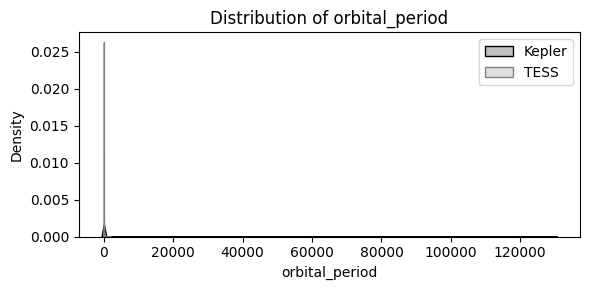

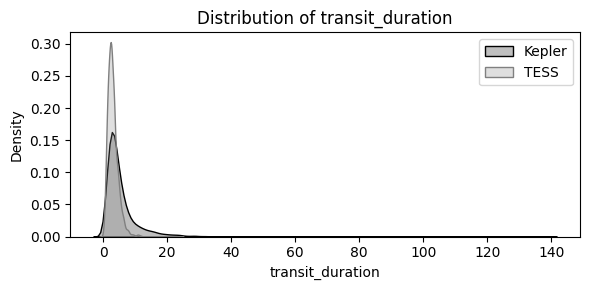

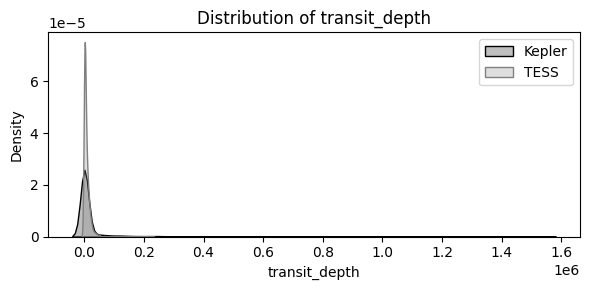

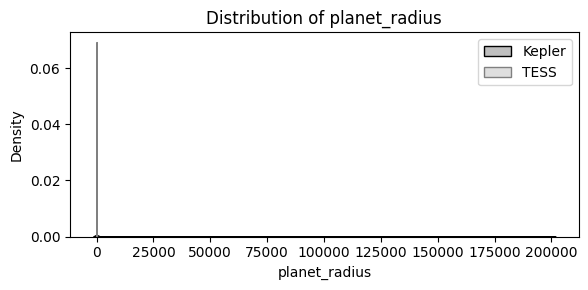

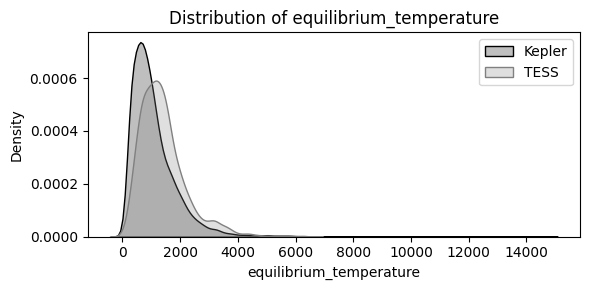

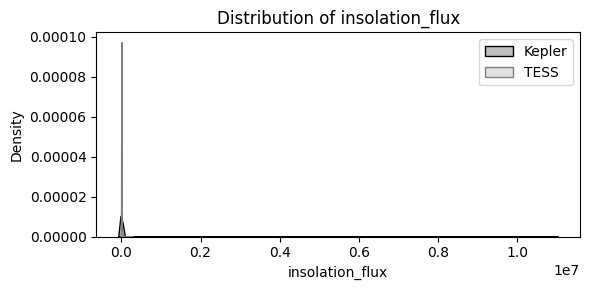

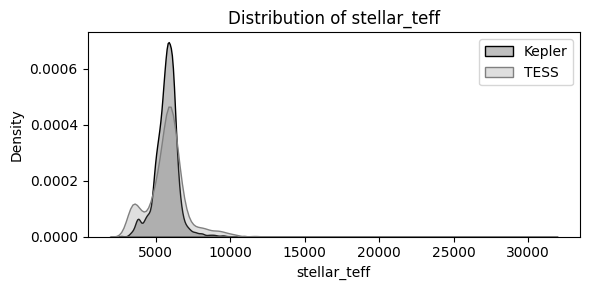

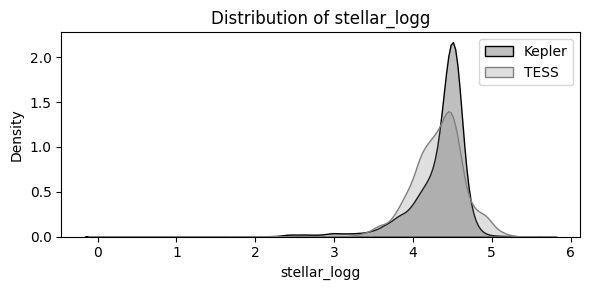

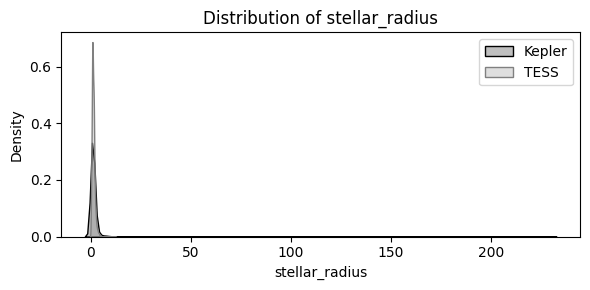

In [28]:
# Checking the distribution of values in each of the features in the datasets
for col in koi_df.columns.drop('target'):
    plt.figure(figsize=(6, 3))
    sns.kdeplot(koi_df[col], label='Kepler', fill=True, color='black')
    sns.kdeplot(tess_df[col], label='TESS', fill=True, color='gray')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Feature relationships and correlation

#### Relationships

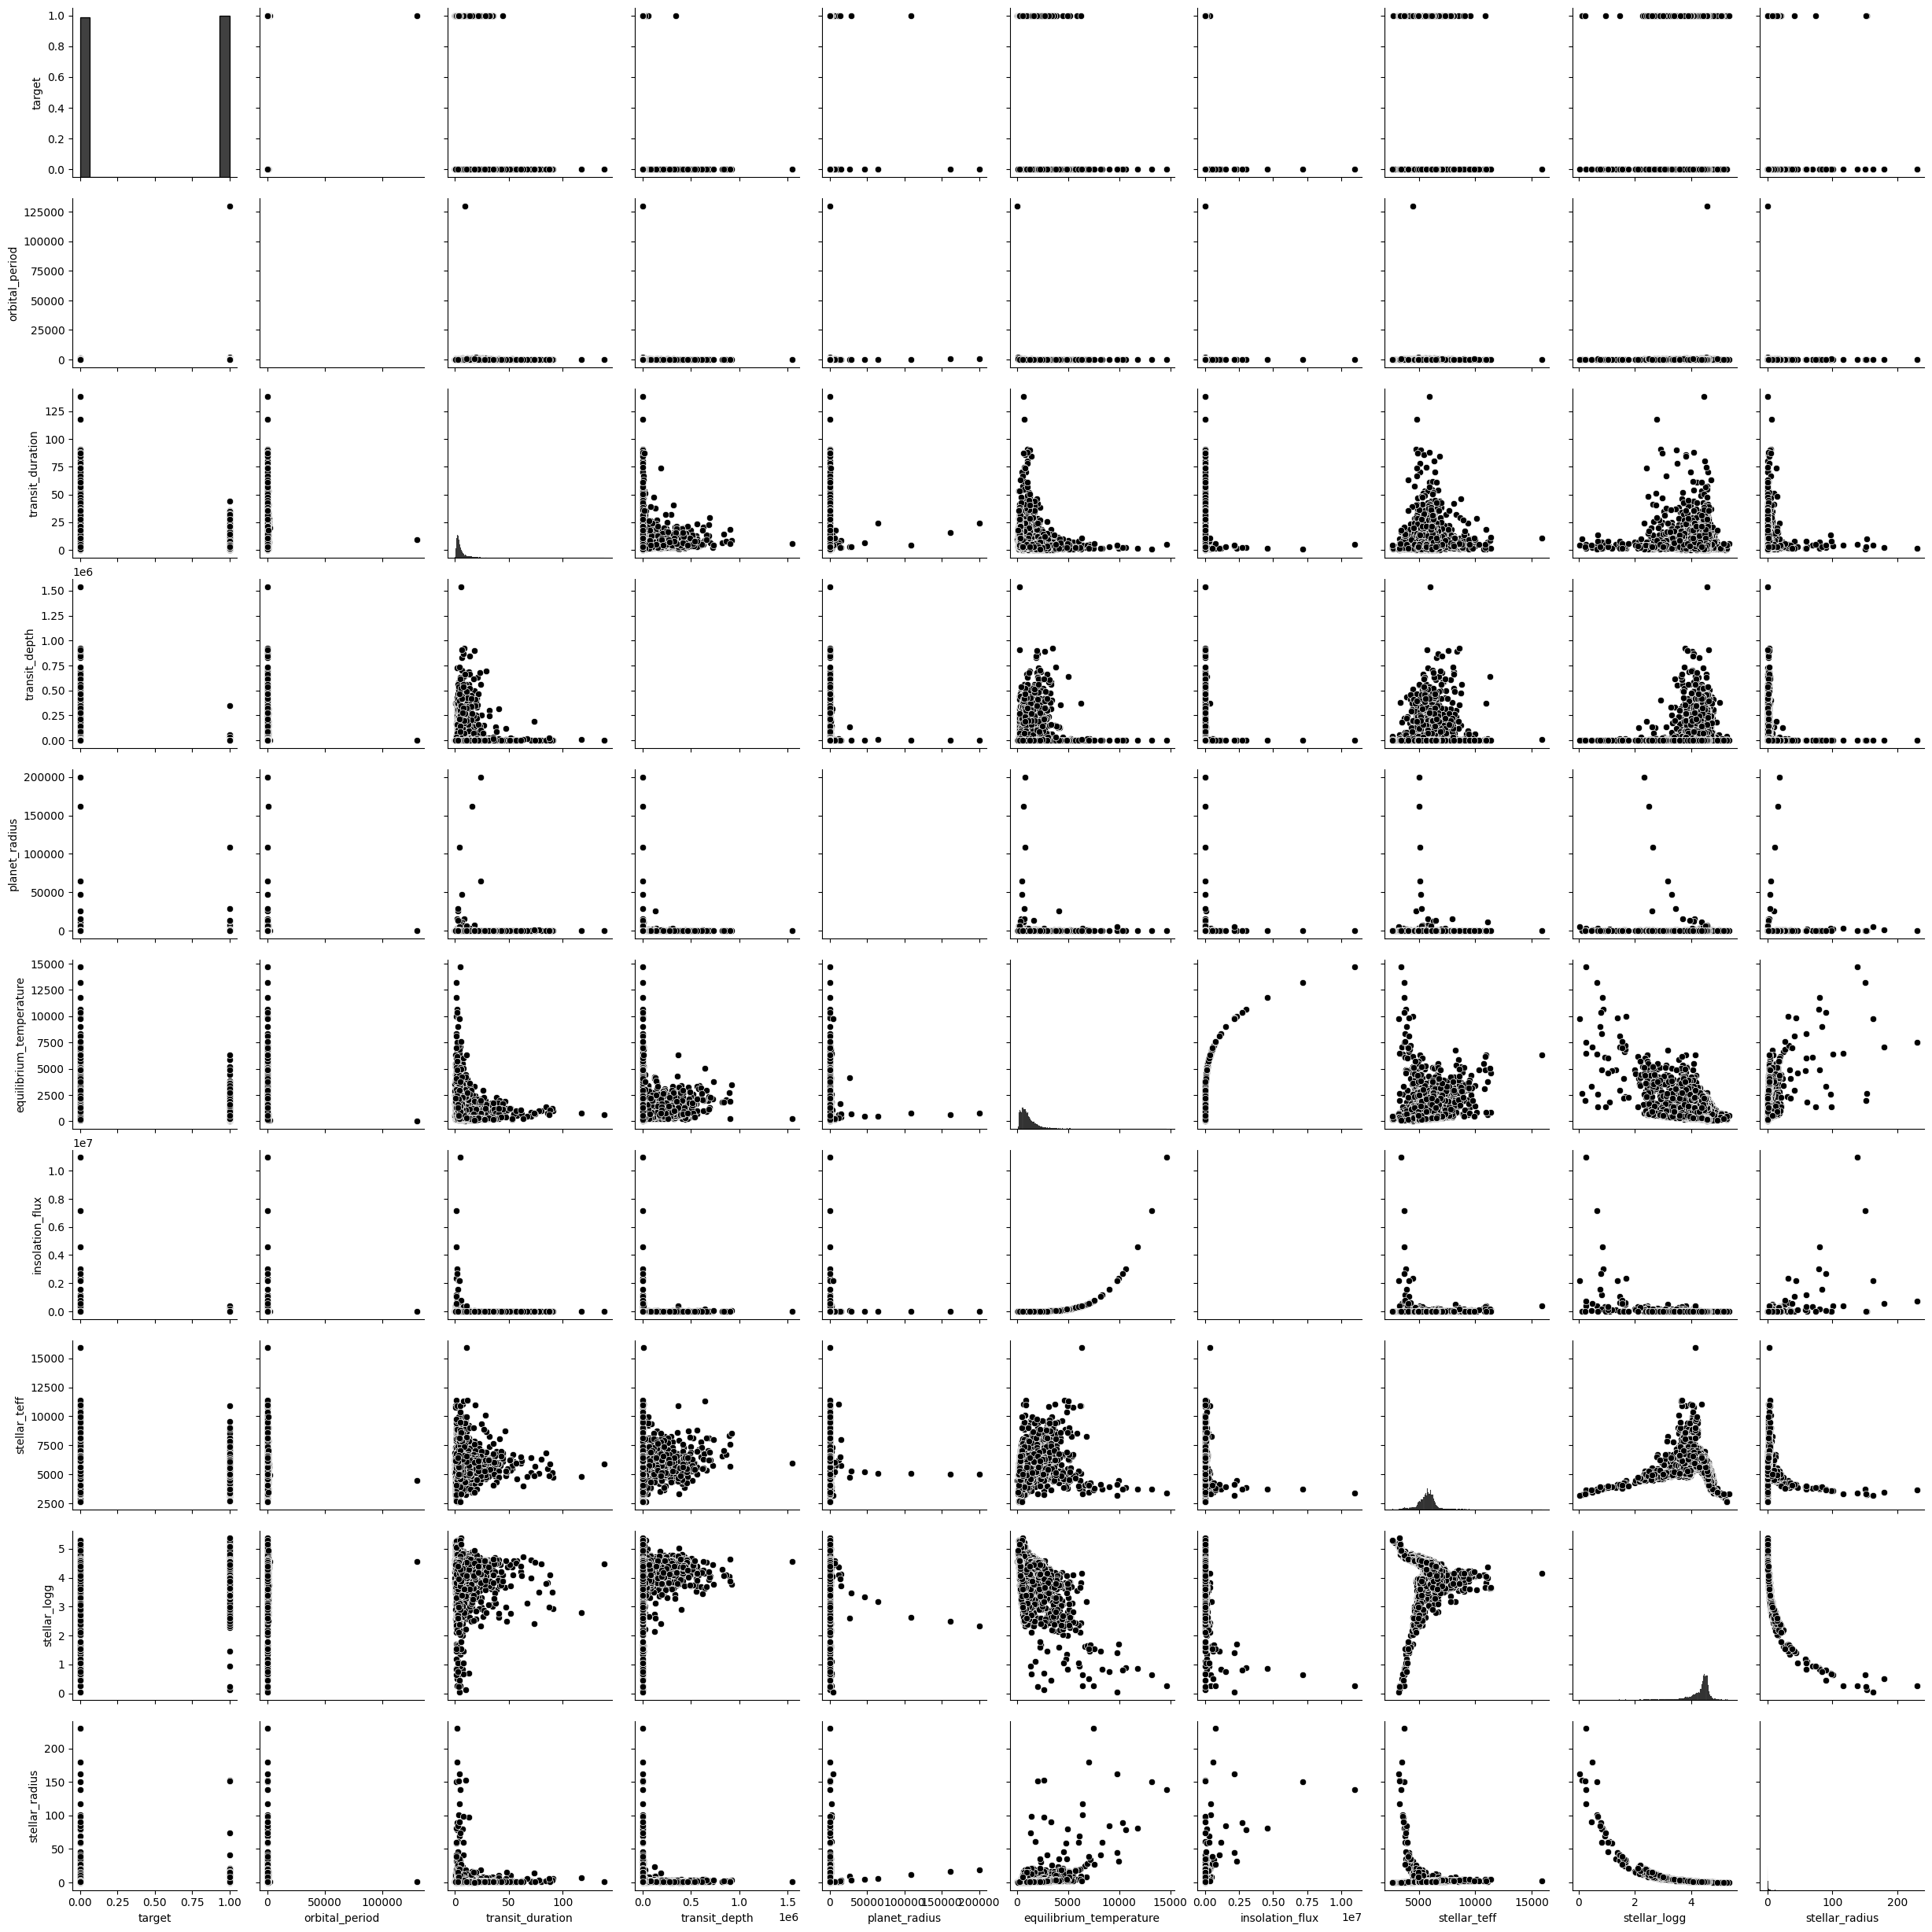

In [70]:
# Creating a pair plot to check relationships of the features for KOI
sns.pairplot(koi_df, height=2.5, plot_kws={'color': 'black'}, diag_kws={'color': 'black', 'edgecolor': 'black'})
plt.show()

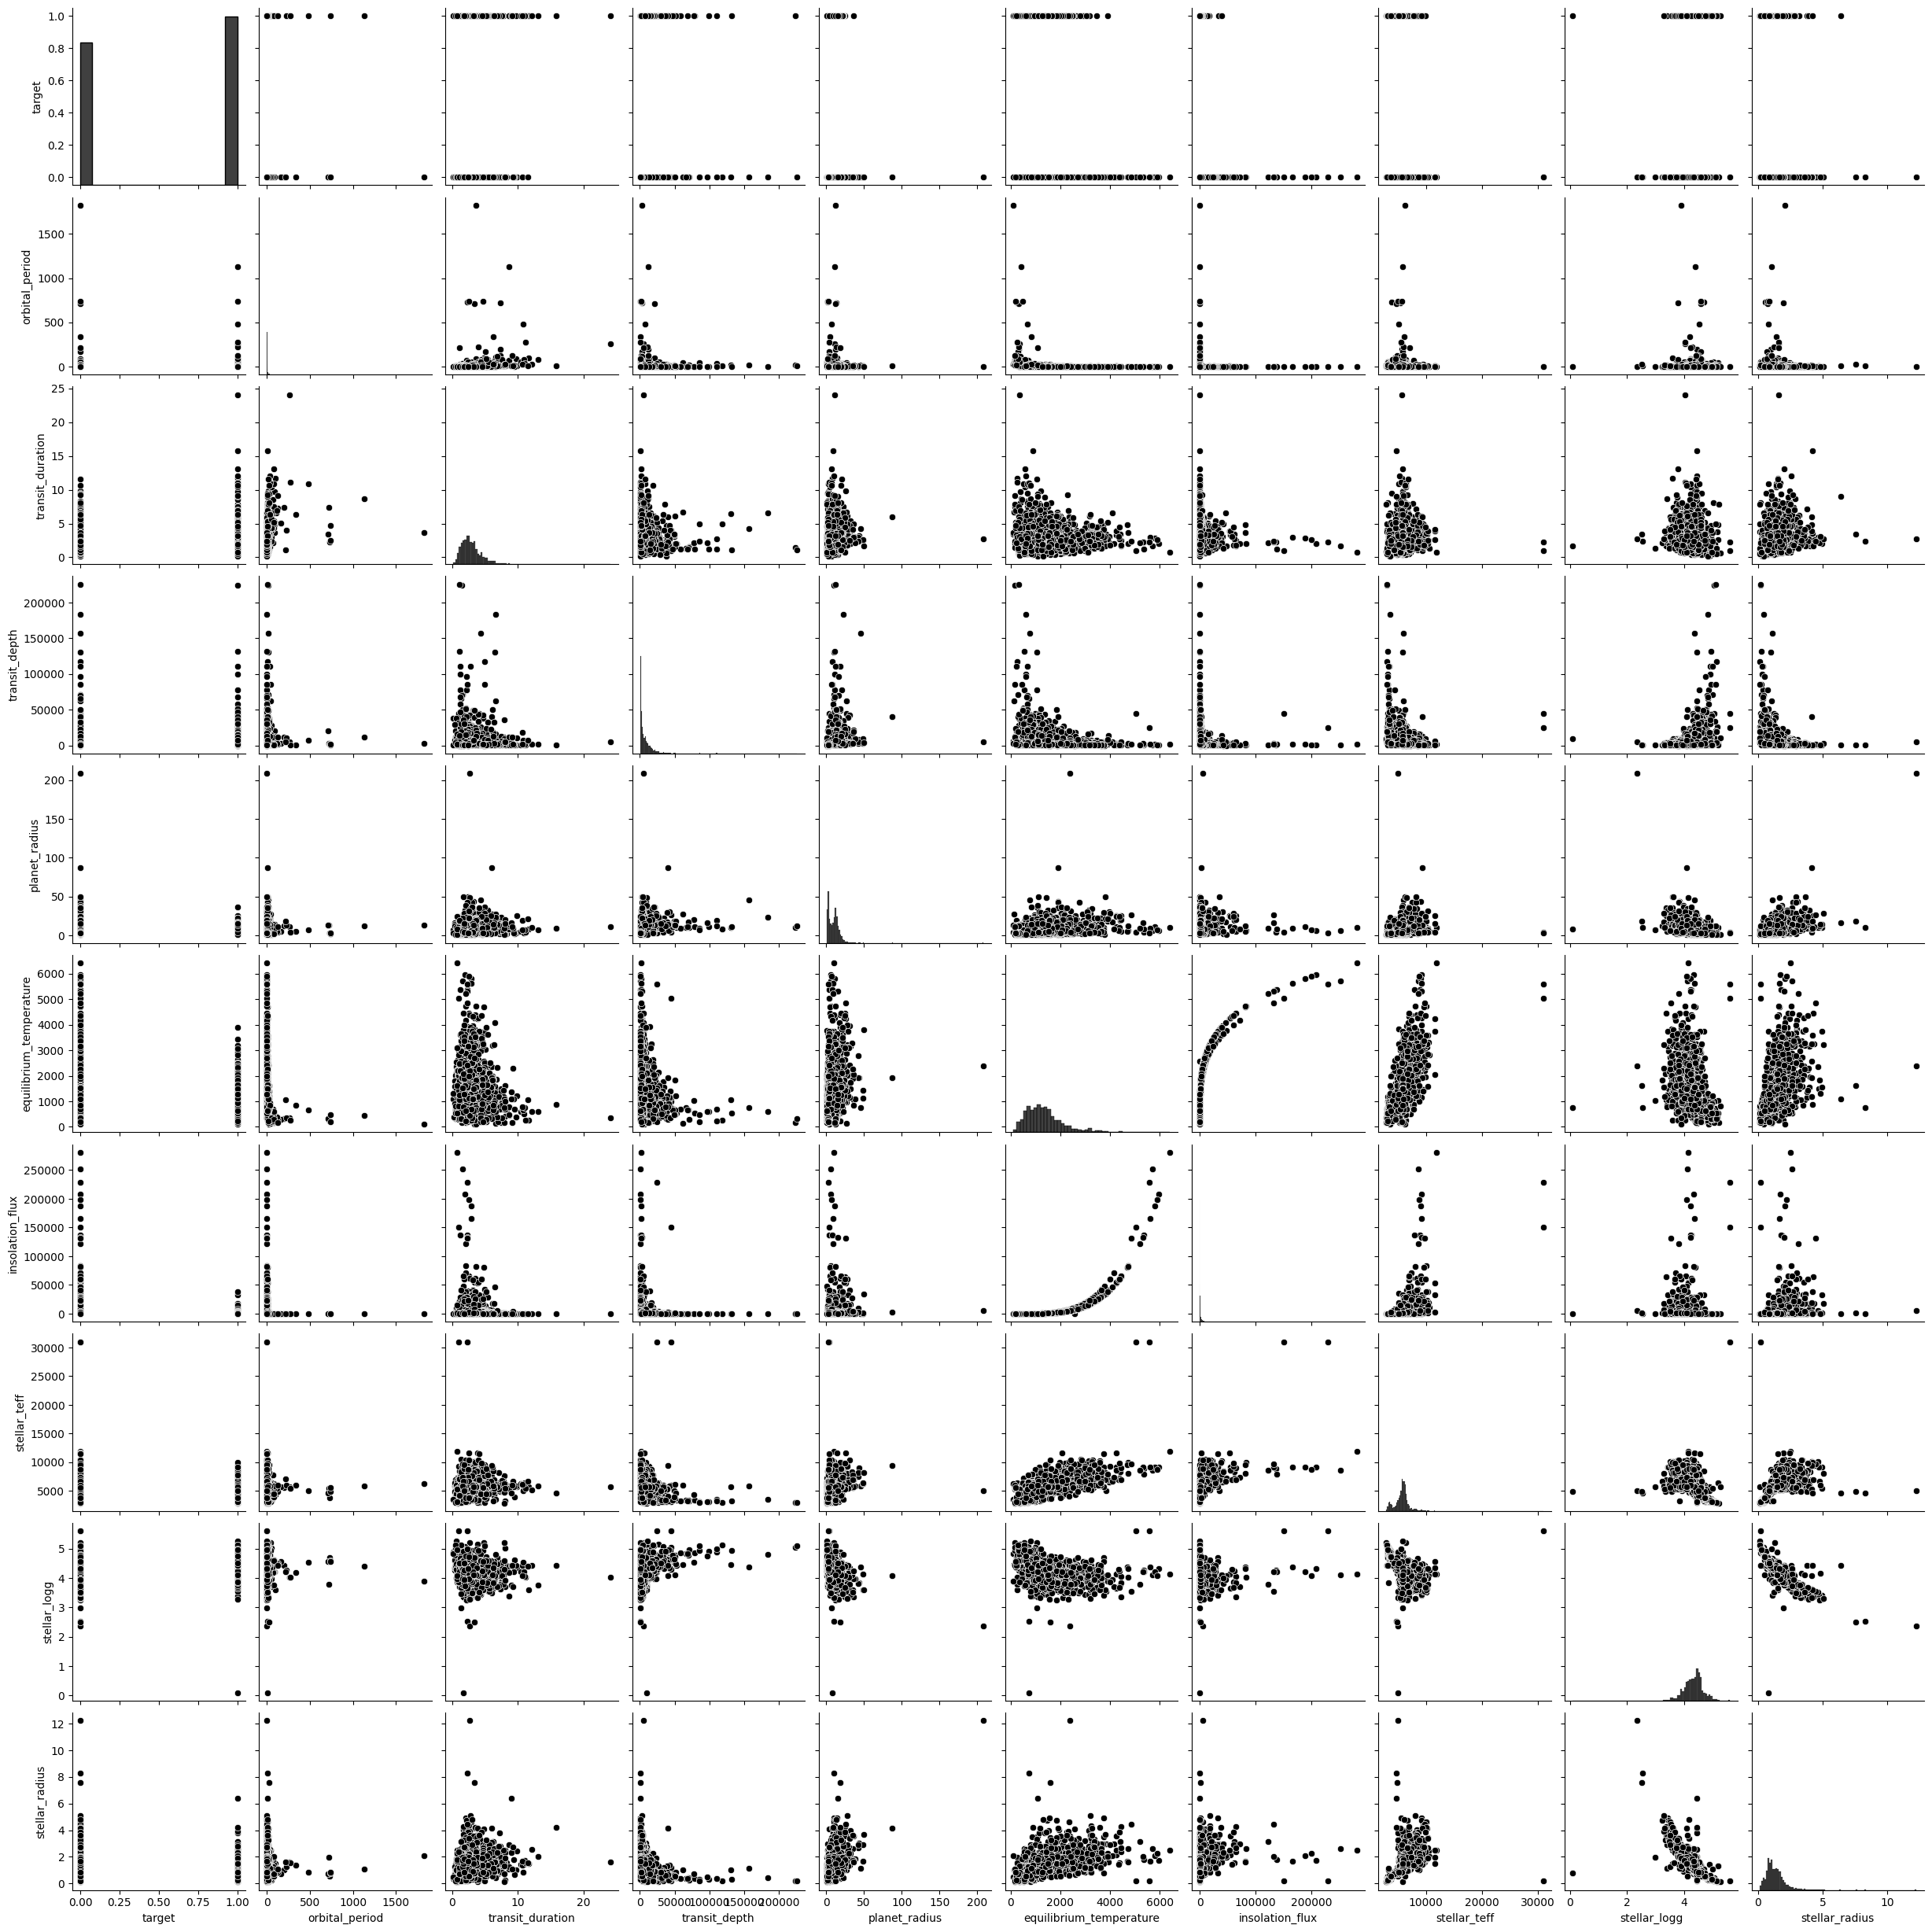

In [71]:
# Creating a pair plot to check relationships of the features for TESS
sns.pairplot(tess_df, height=2.5, plot_kws={'color': 'black'}, diag_kws={'color': 'black', 'edgecolor': 'black'})
plt.show()

#### Correlation matrices

Creating the correlation matrices to check for linear relationships of the features.

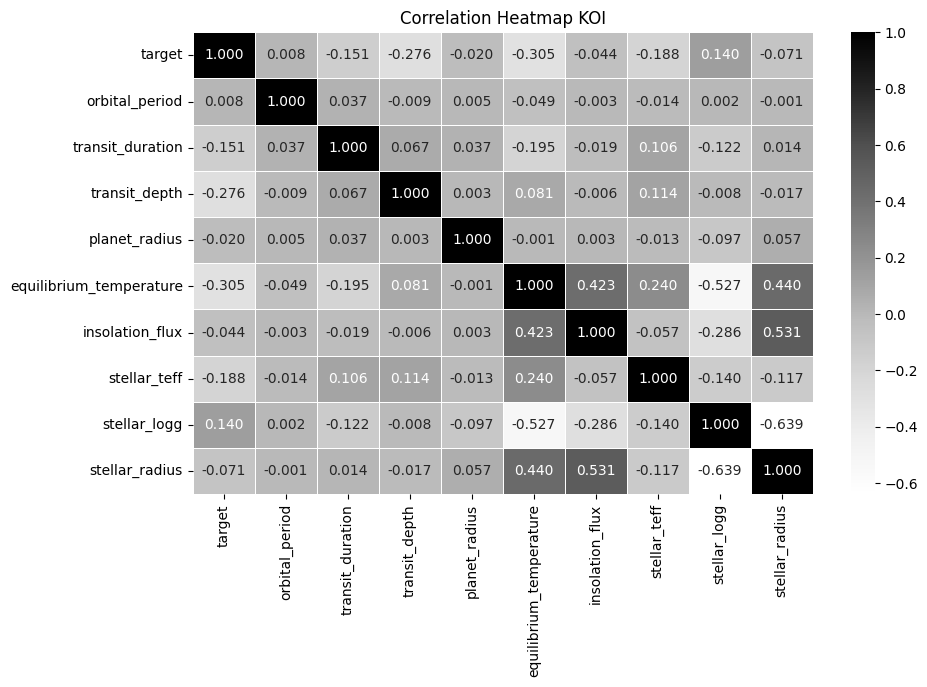

In [31]:
# Creating a correlation heatmap for KOI
plt.figure(figsize=(10, 6))
sns.heatmap(koi_df.corr(), annot=True, cmap='Greys', fmt=".3f", linewidths=0.5)
plt.title("Correlation Heatmap KOI")
plt.show()

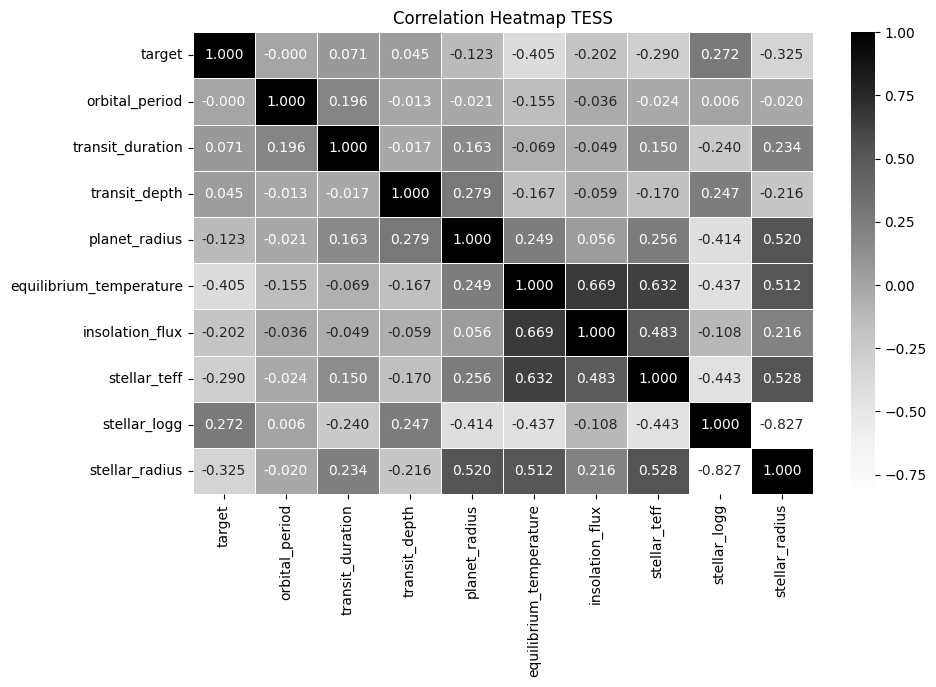

In [32]:
# Creating a correlation heatmap for TESS
plt.figure(figsize=(10, 6))
sns.heatmap(tess_df.corr(), annot=True, cmap='Greys', fmt=".3f", linewidths=0.5)
plt.title("Correlation Heatmap TESS")
plt.show()

### Data Split into Test and Train

In [33]:
# Preparing data for training and test split
X = koi_df.drop('target', axis=1)
y = koi_df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Helper functions

Dataframe to store metrics

In [34]:
# Creating a dataframe wherein some model evaluation metrics will be stored
metrics_df = pd.DataFrame(columns=['Model', 'Training Time (s)', 'Prediction Time (s)', 'Efficiency (accuracy/s)'])

Evaluation

In [35]:
# Creating a function to evaluate the performance of a model
def evaluate(y_test, y_pred):
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}\n")
    print(classification_report(y_test, y_pred))

Measurement for memory usage

In [36]:
# Creating a function that would return the memory used by a process in megabytes
def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / (1024 ** 2)

Train and fit

In [37]:
# Creating a fuction that would fit a model and do prediction
def train_and_fit(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred

Train, fit and measure

In [38]:
# Creating a function that would train the model, fit the model, and do the time and efficiency calculations
def train_fit_measure(model_name, model, x_train, y_train, x_test, y_test):

    # Fiting the model and calculating the time it takes
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time

    # Evaluating the tuned model and calculating the time it takes
    start_time = time.time()
    y_pred = model.predict(x_test)
    prediction_time = time.time() - start_time

    # Calculating the efficiency as accuracy divided by training time
    efficiency = accuracy_score(y_test, y_pred) / training_time

    # Storing metrics in the metrics_df dataframe
    metrics_df.loc[len(metrics_df)] = [model_name, training_time, prediction_time, efficiency]
    
    return y_pred

### Model Selection

First run with default hyperparameters.

In [39]:
# Defining the models that will be used
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting' : GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# Creating a loop for each model to train/fit, predict, and get the accuracy of the models
for name, model in models.items():
    if name == 'Logistic Regression':
        y_pred = train_fit_measure('Logistic Regression', model, X_train, y_train, X_test, y_test)
        lr_model = model
    else:
        y_pred = train_and_fit(model, X_train, y_train, X_test)
    print(f"\n{name}:\n")
    print(f"Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}")
    evaluate(y_test, y_pred)


Logistic Regression:

Training Accuracy: 0.7661684782608695
Test Accuracy: 0.7745790331341662

              precision    recall  f1-score   support

           0       0.83      0.67      0.74       887
           1       0.74      0.87      0.80       954

    accuracy                           0.77      1841
   macro avg       0.78      0.77      0.77      1841
weighted avg       0.78      0.77      0.77      1841


Random Forest:

Training Accuracy: 1.0
Test Accuracy: 0.8337859858772406

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       887
           1       0.83      0.85      0.84       954

    accuracy                           0.83      1841
   macro avg       0.83      0.83      0.83      1841
weighted avg       0.83      0.83      0.83      1841


Gradient Boosting:

Training Accuracy: 0.8479619565217391
Test Accuracy: 0.837588267246062

              precision    recall  f1-score   support

           0       0.85    

#### Logistic Regression (baseline model)

Feature Importance

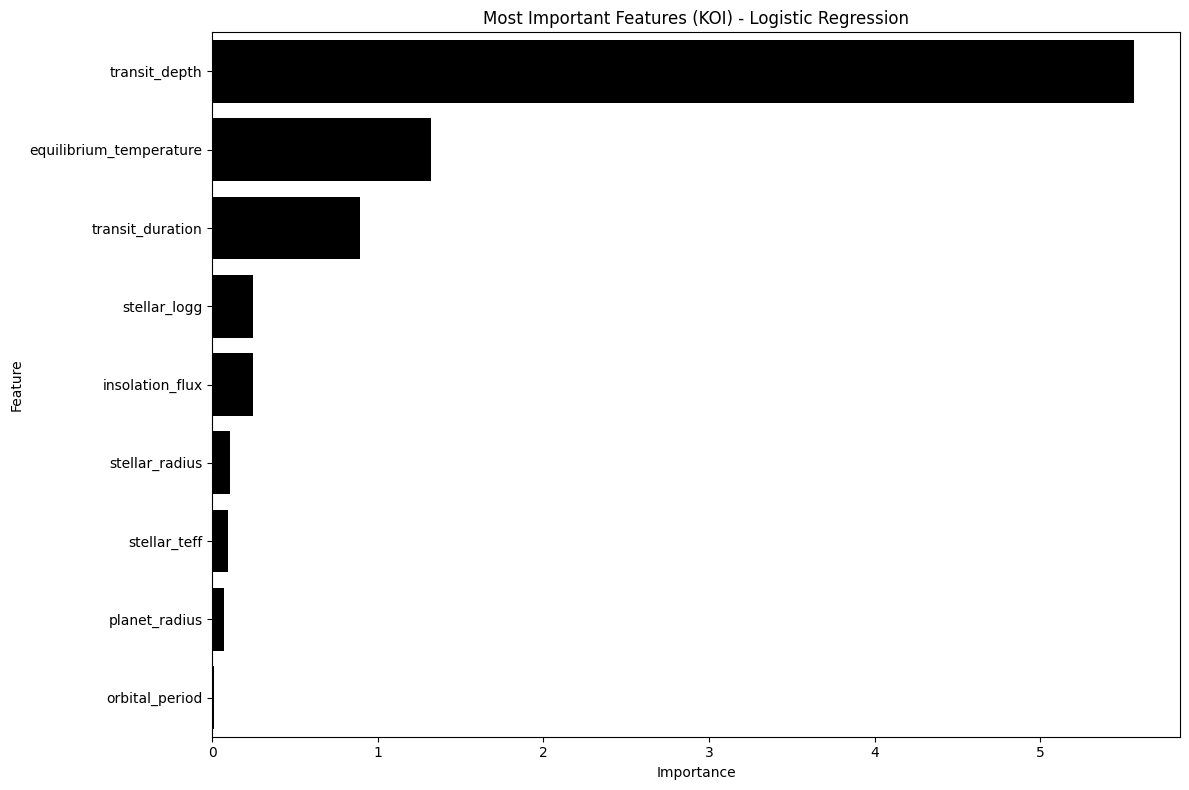

In [40]:
# Getting the absolute values of the coefficients (feature importance)
log_reg_feature_importance = np.abs(lr_model.coef_[0])
feature_names = X.columns

# Creating dataframe for visualisation
log_reg_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': log_reg_feature_importance
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=log_reg_importance_df, color='0')
plt.title("Most Important Features (KOI) - Logistic Regression")
plt.tight_layout()
plt.show()

Recursive Feature Elimination

In [41]:
# Using the best estimator from Grid search as the estimator
rfe_logreg = RFE(estimator=lr_model, n_features_to_select=6)
rfe_logreg.fit(X_train, y_train)
selected_features_logreg = X.columns[rfe_logreg.support_]
print("Top 6 features by RFE (Logistic Regression):", list(selected_features_logreg))

# Transforming the training and testing sets
X_train_rfe_logreg = rfe_logreg.transform(X_train)
X_test_rfe_logreg = rfe_logreg.transform(X_test)

# Training a new Logistic Regression with best parameters on selected features
lr_rfe = LogisticRegression(C=lr_model.C,
                            solver=lr_model.solver,
                            random_state=42)
y_pred_logreg = train_and_fit(lr_rfe, X_train_rfe_logreg, y_train, X_test_rfe_logreg)

print("\nLogistic Regression with RFE-selected features:\n")
evaluate(y_test, y_pred_logreg)

Top 6 features by RFE (Logistic Regression): ['transit_duration', 'transit_depth', 'equilibrium_temperature', 'insolation_flux', 'stellar_logg', 'stellar_radius']

Logistic Regression with RFE-selected features:

Test Accuracy: 0.7713199348180336

              precision    recall  f1-score   support

           0       0.82      0.67      0.74       887
           1       0.74      0.86      0.80       954

    accuracy                           0.77      1841
   macro avg       0.78      0.77      0.77      1841
weighted avg       0.78      0.77      0.77      1841



### Hyperparameter Optimization

#### Random Forest


- n_estimators: Number of trees in the forest.

- max_depth: Maximum depth of each tree.

- criterion: Criterion for measuring quality of split.

- min_samples_split: Minimum number of samples required to split a node.

- min_samples_leaf: Minimum number of samples required to be at a leaf node.

In [ ]:
# Defining the hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'criterion' : ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setting up the GridSearchCV
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')

# Training and fitting the model
y_pred_rf = train_and_fit(rf_grid_search, X_train, y_train, X_test)

# Displaying the best parameters and the best score
print(f"Best Parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best Accuracy for Random Forest: {rf_grid_search.best_score_}")

print("\nRandom Forest:\n")
print(f"Training Accuracy: {accuracy_score(y_train, rf_grid_search.predict(X_train))}")
evaluate(y_test, y_pred_rf)

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy for Random Forest: 0.8335597826086957

Random Forest:

Training Accuracy: 0.9860054347826087
Test Accuracy: 0.837588267246062

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       887
           1       0.83      0.86      0.85       954

    accuracy                           0.84      1841
   macro avg       0.84      0.84      0.84      1841
weighted avg       0.84      0.84      0.84      1841



Measures against overfitting

In [ ]:
# Defining the hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100], # Decrease estimators
    'max_depth': [5, 10], # Limit max_depth
    'criterion' : ['gini', 'entropy'],
    'min_samples_split': [3, 5, 10], # Increase min_samples_split
    'min_samples_leaf': [4, 6] # Increase number min_sample_leaf
}

# Setting up the GridSearchCV
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')

# Training and fitting model
y_pred_rf = train_fit_measure('Random Forest', rf_grid_search, X_train, y_train, X_test, y_test)

# Displaying the best parameters and the best score
print(f"Best Parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best Accuracy for Random Forest: {rf_grid_search.best_score_}")

print("\nRandom Forest:\n")
print(f"Training Accuracy: {accuracy_score(y_train, rf_grid_search.predict(X_train))}")
evaluate(y_test, y_pred_rf)

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 50}
Best Accuracy for Random Forest: 0.8274456521739131

Random Forest:

Training Accuracy: 0.8778532608695652
Test Accuracy: 0.8365019011406845

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       887
           1       0.82      0.87      0.85       954

    accuracy                           0.84      1841
   macro avg       0.84      0.84      0.84      1841
weighted avg       0.84      0.84      0.84      1841



Feature Importance

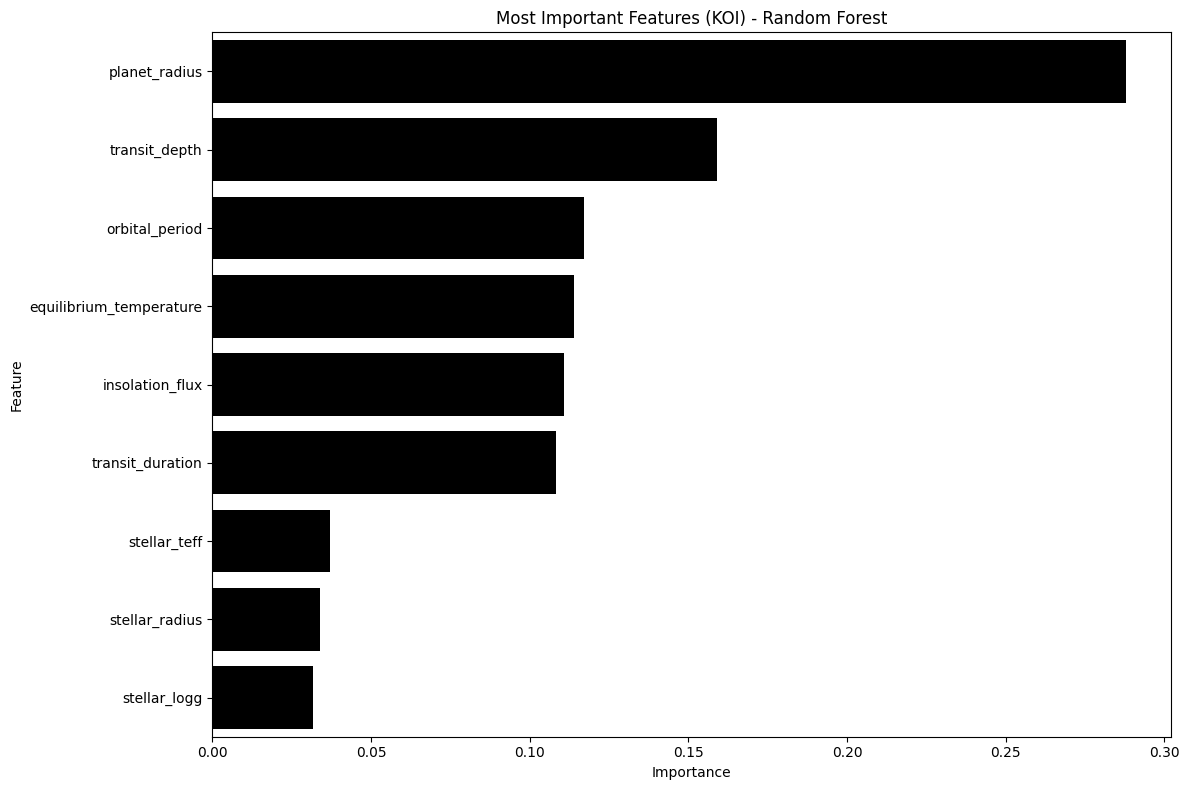

In [44]:
# Getting the best model from GridSearch
best_rf = rf_grid_search.best_estimator_

# Getting the feature importances
rf_feature_importance = best_rf.feature_importances_

# Creating a dataframe for visualisation
rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df, color='0')
plt.title("Most Important Features (KOI) - Random Forest")
plt.tight_layout()
plt.show()

Recursive Feature Elimination

In [45]:
# Setting up the RFE with the best estimator and select top 6 features
rfe_selector = RFE(estimator=best_rf, n_features_to_select=6, step=1)
rfe_selector = rfe_selector.fit(X_train, y_train)
selected_features = X.columns[rfe_selector.support_]
print("Top 6 selected features by RFE:", list(selected_features))

# Transforming the training and testing sets
X_train_rfe = rfe_selector.transform(X_train)
X_test_rfe = rfe_selector.transform(X_test)

# Training a new Random Forest with best parameters on selected features
rf_rfe = RandomForestClassifier(n_estimators=best_rf.n_estimators,
                                max_depth=best_rf.max_depth,
                                criterion=best_rf.criterion,
                                min_samples_split=best_rf.min_samples_split,
                                min_samples_leaf=best_rf.min_samples_leaf,
                                random_state=42)
y_pred_rfe = train_and_fit(rf_rfe, X_train_rfe, y_train, X_test_rfe)

print("\nRandom Forest with RFE-selected features:")
evaluate(y_test, y_pred_rfe)

Top 6 selected features by RFE: ['orbital_period', 'transit_duration', 'transit_depth', 'planet_radius', 'equilibrium_temperature', 'insolation_flux']

Random Forest with RFE-selected features:
Test Accuracy: 0.8267246061922868

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       887
           1       0.81      0.86      0.84       954

    accuracy                           0.83      1841
   macro avg       0.83      0.83      0.83      1841
weighted avg       0.83      0.83      0.83      1841



#### Gradient Boosting


- n_estimators: Number of boosting stages to be run.

- learning_rate: Shrinks the contribution of each tree.

- max_depth: Maximum depth of the individual trees.

In [ ]:
# Defining the hyperparameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9]
}

# Setting up the GridSearchCV
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy')

# Training and fitting the model
y_pred_gb = train_and_fit(gb_grid_search, X_train, y_train, X_test)

# Displaying the best parameters and the best score
print(f"Best Parameters for Gradient Boosting: {gb_grid_search.best_params_}")
print(f"Best Accuracy for Gradient Boosting: {gb_grid_search.best_score_}")

print("\nGradient Boosting:\n")
print(f"Training Accuracy: {accuracy_score(y_train, gb_grid_search.predict(X_train))}")
evaluate(y_test, y_pred_gb)

Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 500}
Best Accuracy for Gradient Boosting: 0.8353260869565217

Gradient Boosting:

Training Accuracy: 1.0
Test Accuracy: 0.8392178164041282

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       887
           1       0.84      0.86      0.85       954

    accuracy                           0.84      1841
   macro avg       0.84      0.84      0.84      1841
weighted avg       0.84      0.84      0.84      1841



Measures against overfitting

In [ ]:
# Defining the hyperparameter grid
param_grid_gb = {
    'n_estimators': [50, 100], # Limit estimators
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7] # Reduce max_depth
}

# Setting up the GridSearchCV
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy')

# Training and fitting the model
y_pred_gb = train_fit_measure('Gradient Boosting', gb_grid_search, X_train, y_train, X_test, y_test)

# Displaying the best parameters and the best score
print(f"Best Parameters for Gradient Boosting: {gb_grid_search.best_params_}")
print(f"Best Accuracy for Gradient Boosting: {gb_grid_search.best_score_}")

print("\nGradient Boosting:\n")
print(f"Training Accuracy: {accuracy_score(y_train, gb_grid_search.predict(X_train))}")
evaluate(y_test, y_pred_gb)

Best Parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Best Accuracy for Gradient Boosting: 0.8309782608695653

Gradient Boosting:

Training Accuracy: 0.8737771739130434
Test Accuracy: 0.8413905486148832

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       887
           1       0.83      0.87      0.85       954

    accuracy                           0.84      1841
   macro avg       0.84      0.84      0.84      1841
weighted avg       0.84      0.84      0.84      1841



Feature Importance

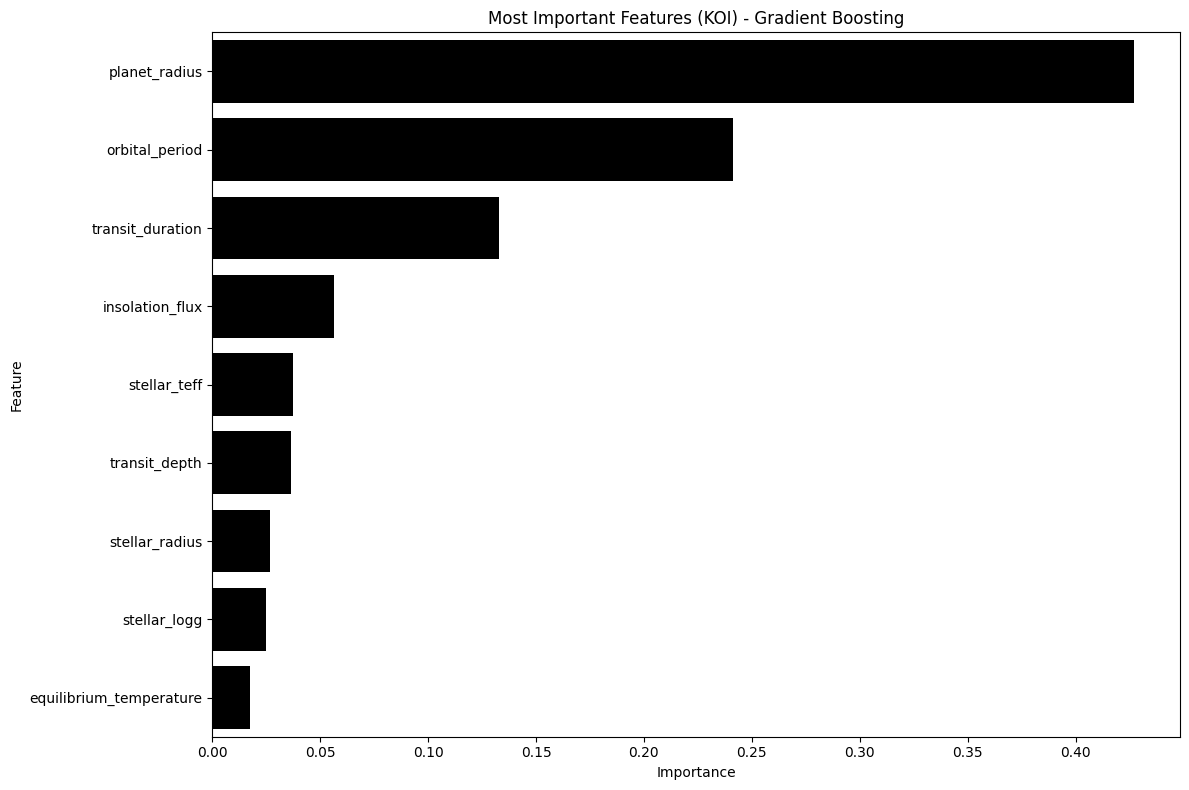

In [48]:
# Getting the best model from GridSearch
best_gb = gb_grid_search.best_estimator_

# Getting the feature importance
gb_feature_importance = best_gb.feature_importances_

# Creating a dataframe for visualisation
gb_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_feature_importance
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=gb_importance_df, color='0')
plt.title("Most Important Features (KOI) - Gradient Boosting")
plt.tight_layout()
plt.show()

Recursive Feature Elimination

In [49]:
# Using the best estimator from Grid search as the estimator
rfe_gb = RFE(estimator=best_gb, n_features_to_select=6)
rfe_gb.fit(X_train, y_train)
selected_features_gb = X.columns[rfe_gb.support_]
print("Top 6 features by RFE (Gradient Boosting):", list(selected_features_gb))

# Transforming the training and testing sets
X_train_rfe_gb = rfe_gb.transform(X_train)
X_test_rfe_gb = rfe_gb.transform(X_test)

# Training a new Gradient Boosting with best parameters on selected features
gb_ref = GradientBoostingClassifier(n_estimators=best_gb.n_estimators,
                                max_depth=best_gb.max_depth,
                                learning_rate=best_gb.learning_rate,
                                random_state=42)
y_pred_gb = train_and_fit(gb_ref, X_train_rfe_gb, y_train, X_test_rfe_gb)

print("\nGradient Boosting with RFE-selected features:\n")
evaluate(y_test, y_pred_gb)

Top 6 features by RFE (Gradient Boosting): ['orbital_period', 'transit_duration', 'transit_depth', 'planet_radius', 'insolation_flux', 'stellar_radius']

Gradient Boosting with RFE-selected features:

Test Accuracy: 0.8316132536664856

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       887
           1       0.82      0.86      0.84       954

    accuracy                           0.83      1841
   macro avg       0.83      0.83      0.83      1841
weighted avg       0.83      0.83      0.83      1841



#### SVM


- C: Regularization parameter (higher values mean less regularization).

- kernel: The type of kernel to use ('linear', 'rbf', 'poly', 'sigmoid').

- gamma: Kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’ kernels.

In [ ]:
# Defining the hyperparameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 50, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Setting up the GridSearchCV
svm_grid_search = GridSearchCV(SVC(random_state=42, probability=True), param_grid_svm, cv=5, scoring='accuracy')

# Training and fitting the model
y_pred_svm = train_fit_measure('SVM', svm_grid_search, X_train, y_train, X_test, y_test)

# Displaying the best parameters and the best score
print(f"Best Parameters for SVM: {svm_grid_search.best_params_}")
print(f"Best Accuracy for SVM: {svm_grid_search.best_score_}")

print("\nSVM:\n")
print(f"Training Accuracy: {accuracy_score(y_train, svm_grid_search.predict(X_train))}")
evaluate(y_test, y_pred_svm)

# Extracting best model
best_svm = svm_grid_search.best_estimator_

Best Parameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy for SVM: 0.8051630434782607

SVM:

Training Accuracy: 0.8191576086956521
Test Accuracy: 0.8212927756653993

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       887
           1       0.81      0.85      0.83       954

    accuracy                           0.82      1841
   macro avg       0.82      0.82      0.82      1841
weighted avg       0.82      0.82      0.82      1841



#### Stacking

With Logistic Regression as final estimator

In [ ]:
# Defining the base learners using the best estimators from grid search
estimators = [
    ('logreg', lr_model),
    ('rf', best_rf),
    ('gb', best_gb),
    ('svm', best_svm)
]

# Defining the final estimator
final_estimator = LogisticRegression(random_state=42)

# Building the stacking classifier
stacking_1= StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    passthrough=False
)

# Training and fitting the model
y_pred_stack = train_and_fit(stacking_1, X_train, y_train, X_test)

print("\nStacking Classifier:\n")
print(f"Training Accuracy: {accuracy_score(y_train, stacking_1.predict(X_train))}")
evaluate(y_test, y_pred_stack)


Stacking Classifier:

Training Accuracy: 0.8677989130434782
Test Accuracy: 0.8489951113525258

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       887
           1       0.85      0.86      0.86       954

    accuracy                           0.85      1841
   macro avg       0.85      0.85      0.85      1841
weighted avg       0.85      0.85      0.85      1841



With Gradient Boosting as final estimator

In [ ]:
# Defining the base learners using the best estimators from grid search
estimators = [
    ('logreg', lr_model),
    ('rf', best_rf),
    ('gb', best_gb),
    ('svm', best_svm)
]

# Defining the final estimator
final_estimator = GradientBoostingClassifier(random_state=42)

# Building the stacking classifier
stacking_2= StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    passthrough=False
)

# Training and fitting model
y_pred_stack = train_and_fit(stacking_2, X_train, y_train, X_test)

print("\nStacking Classifier:\n")
print(f"Training Accuracy: {accuracy_score(y_train, stacking_2.predict(X_train))}")
evaluate(y_test, y_pred_stack)


Stacking Classifier:

Training Accuracy: 0.8692934782608696
Test Accuracy: 0.844106463878327

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       887
           1       0.85      0.85      0.85       954

    accuracy                           0.84      1841
   macro avg       0.84      0.84      0.84      1841
weighted avg       0.84      0.84      0.84      1841



With SVM as final estimator

In [ ]:
# Defining the base learners using the best estimators from grid search
estimators = [
    ('logreg', lr_model),
    ('rf', best_rf),
    ('gb', best_gb),
    ('svm', best_svm)
]

# Defining the final estimator
final_estimator = SVC(random_state=42)

# Building the stacking classifier
stacking_3= StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    passthrough=False
)

# Training and fitting model
y_pred_stack = train_and_fit(stacking_3, X_train, y_train, X_test)

print("\nStacking Classifier:\n")
print(f"Training Accuracy: {accuracy_score(y_train, stacking_3.predict(X_train))}")
evaluate(y_test, y_pred_stack)


Stacking Classifier:

Training Accuracy: 0.8627717391304348
Test Accuracy: 0.8473655621944596

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       887
           1       0.85      0.86      0.85       954

    accuracy                           0.85      1841
   macro avg       0.85      0.85      0.85      1841
weighted avg       0.85      0.85      0.85      1841



With SVM as final estimator and newly initialized base learners

In [ ]:
# Defining the base learners using the best estimators from grid search
estimators = [
    ('logreg', LogisticRegression(C=lr_model.C, solver=lr_model.solver, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=best_rf.n_estimators,
                                max_depth=best_rf.max_depth,
                                criterion=best_rf.criterion,
                                min_samples_split=best_rf.min_samples_split,
                                min_samples_leaf=best_rf.min_samples_leaf,
                                random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=best_gb.n_estimators,
                                max_depth=best_gb.max_depth,
                                learning_rate=best_gb.learning_rate,
                                random_state=42)),
    ('svm', SVC(C=best_svm.C, gamma=best_svm.gamma, kernel=best_svm.kernel))
]

# Defining the final estimator
final_estimator = SVC(random_state=42)

# Building the stacking classifier
stacking_4= StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    passthrough=False
)

# Training and fitting model
y_pred_stack = train_fit_measure('Stacking', stacking_4, X_train, y_train, X_test, y_test)

print("\nStacking Classifier:\n")
print(f"Training Accuracy: {accuracy_score(y_train, stacking_4.predict(X_train))}")
evaluate(y_test, y_pred_stack)


Stacking Classifier:

Training Accuracy: 0.8601902173913043
Test Accuracy: 0.8479087452471483

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       887
           1       0.85      0.85      0.85       954

    accuracy                           0.85      1841
   macro avg       0.85      0.85      0.85      1841
weighted avg       0.85      0.85      0.85      1841



### Computational Efficiency of models

In [55]:
# Displaying the metrics_df dataframe
metrics_df

,Model,Training Time (s),Prediction Time (s),Efficiency (accuracy/s)
0,Logistic Regression,0.011084,0.000142,69.882124
1,Random Forest,22.400855,0.006618,0.037342
2,Gradient Boosting,35.106352,0.004382,0.023967
3,SVM,113.632507,0.228385,0.007228
4,Stacking,6.579904,0.437201,0.128863


## Testing on TESS

### Prepare data

In [56]:
# Splitting the whole Tess dataset into target and features
X_tess = tess_df.drop('target', axis=1)
y_tess = tess_df['target']
tess_scaler = StandardScaler()
X_tess_scaled = tess_scaler.fit_transform(X_tess)

### Logistic Regression

In [57]:
# Testing trained logistic regression model on TESS
y_pred_tess_lr = lr_model.predict(X_tess_scaled)
print("\nLogistic Regression:\n")
evaluate(y_tess, y_pred_tess_lr)


Logistic Regression:

Test Accuracy: 0.4972041006523765

              precision    recall  f1-score   support

         0.0       0.46      0.54      0.50       982
         1.0       0.54      0.46      0.50      1164

    accuracy                           0.50      2146
   macro avg       0.50      0.50      0.50      2146
weighted avg       0.50      0.50      0.50      2146



### Random Forest

In [58]:
# Testing trained random forest model on TESS
y_pred_tess_rf = best_rf.predict(X_tess_scaled)
print("\nRandom Forest:\n")
evaluate(y_tess, y_pred_tess_rf)


Random Forest:

Test Accuracy: 0.5125815470643057

              precision    recall  f1-score   support

         0.0       0.48      0.87      0.62       982
         1.0       0.65      0.21      0.32      1164

    accuracy                           0.51      2146
   macro avg       0.57      0.54      0.47      2146
weighted avg       0.58      0.51      0.46      2146



### Gradient Boosting

In [59]:
# Testing trained gradient boosting model on TESS
y_pred_tess_gb = best_gb.predict(X_tess_scaled)
print("\nGradient Boosting:\n")
evaluate(y_tess, y_pred_tess_gb)


Gradient Boosting:

Test Accuracy: 0.4869524697110904

              precision    recall  f1-score   support

         0.0       0.47      0.93      0.62       982
         1.0       0.65      0.12      0.20      1164

    accuracy                           0.49      2146
   macro avg       0.56      0.52      0.41      2146
weighted avg       0.57      0.49      0.39      2146



### SVM

In [60]:
# Testing trained support vector machine model on TESS
y_pred_tess_svm = best_svm.predict(X_tess_scaled)
print("\nSVM:\n")
evaluate(y_tess, y_pred_tess_svm)


SVM:

Test Accuracy: 0.4384902143522833

              precision    recall  f1-score   support

         0.0       0.41      0.49      0.44       982
         1.0       0.48      0.40      0.43      1164

    accuracy                           0.44      2146
   macro avg       0.44      0.44      0.44      2146
weighted avg       0.45      0.44      0.44      2146



### Stacking

In [61]:
# Testing trained stacking model on TESS
y_pred_tess_stacking = stacking_4.predict(X_tess_scaled)
print("\nStacking:\n")
evaluate(y_tess, y_pred_tess_stacking)


Stacking:

Test Accuracy: 0.48555452003727867

              precision    recall  f1-score   support

         0.0       0.47      0.89      0.61       982
         1.0       0.61      0.14      0.23      1164

    accuracy                           0.49      2146
   macro avg       0.54      0.52      0.42      2146
weighted avg       0.54      0.49      0.41      2146



### Transfer Learning with TESS

#### Splitting data into training and test

In [62]:
# Splitting the TESS dataset into train and test
X_train_tess, X_test_tess, y_train_tess, y_test_tess = train_test_split(X_tess_scaled, y_tess, test_size=0.2, random_state=42)

#### Logistic Regression

In [63]:
# Fitting the model and predicting
y_pred_tess_lr = train_and_fit(lr_model, X_train_tess, y_train_tess, X_test_tess)

# Evaluating
print("\nLogistic Regression:\n")
evaluate(y_test_tess, y_pred_tess_lr)


Logistic Regression:

Test Accuracy: 0.6953488372093023

              precision    recall  f1-score   support

         0.0       0.69      0.56      0.62       189
         1.0       0.70      0.80      0.75       241

    accuracy                           0.70       430
   macro avg       0.69      0.68      0.68       430
weighted avg       0.69      0.70      0.69       430



#### Random Forest

In [64]:
# Fitting the model and predicting
y_pred_tess_rf = train_and_fit(best_rf, X_train_tess, y_train_tess, X_test_tess)

# Evaluating
print("\nRandom Forest:\n")
evaluate(y_test_tess, y_pred_tess_rf)


Random Forest:

Test Accuracy: 0.8046511627906977

              precision    recall  f1-score   support

         0.0       0.83      0.70      0.76       189
         1.0       0.79      0.89      0.84       241

    accuracy                           0.80       430
   macro avg       0.81      0.79      0.80       430
weighted avg       0.81      0.80      0.80       430



#### Gradient Boosting

In [65]:
# Fitting the model and predicting
y_pred_tess_gb = train_and_fit(best_gb, X_train_tess, y_train_tess, X_test_tess)

# Evaluating
print("\nGradient Boosting:\n")
evaluate(y_test_tess, y_pred_tess_gb)


Gradient Boosting:

Test Accuracy: 0.8023255813953488

              precision    recall  f1-score   support

         0.0       0.84      0.68      0.75       189
         1.0       0.78      0.90      0.84       241

    accuracy                           0.80       430
   macro avg       0.81      0.79      0.79       430
weighted avg       0.81      0.80      0.80       430



#### SVM

In [66]:
# Fitting the model and predicting
y_pred_tess_svm = train_and_fit(best_svm, X_train_tess, y_train_tess, X_test_tess)

# Evaluating
print("\nSVM:\n")
evaluate(y_test_tess, y_pred_tess_svm)


SVM:

Test Accuracy: 0.813953488372093

              precision    recall  f1-score   support

         0.0       0.83      0.73      0.78       189
         1.0       0.81      0.88      0.84       241

    accuracy                           0.81       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.81      0.81      0.81       430



#### Stacking

In [67]:
# Fitting the model and predicting
y_pred_tess_stacking = train_and_fit(stacking_4, X_train_tess, y_train_tess, X_test_tess)

# Evaluating
print("\nStacking:\n")
evaluate(y_test_tess, y_pred_tess_stacking)


Stacking:

Test Accuracy: 0.827906976744186

              precision    recall  f1-score   support

         0.0       0.84      0.76      0.79       189
         1.0       0.82      0.88      0.85       241

    accuracy                           0.83       430
   macro avg       0.83      0.82      0.82       430
weighted avg       0.83      0.83      0.83       430

